In [13]:
%%capture
%pip install numpy
%pip install matplotlib
%pip install pandas
%pip install scikit-learn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from math import log, exp

### Create dummy data

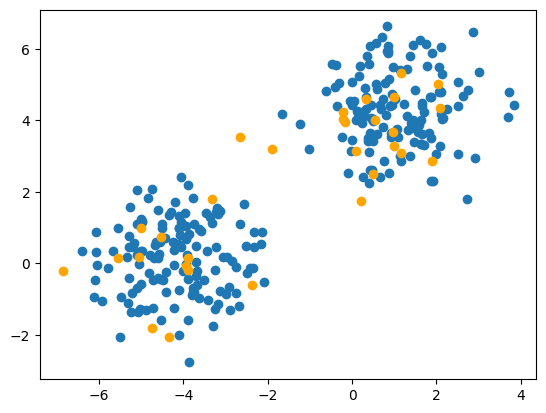

In [14]:
N_FEATURES = 2
X, Y = make_blobs(n_samples=300, centers=2, n_features=N_FEATURES, random_state=3)

# Split into train/val set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.scatter(X_test[:, 0], X_test[:, 1], c='orange')
plt.show()

# add X_0 to all sets
ones = np.zeros((len(X_train), 1))
X_train = np.hstack((ones, X_train))
ones = np.zeros((len(X_test), 1))
X_test = np.hstack((ones, X_test))

### Logistic Regression

[1/10] Loss: -2.259409228117676


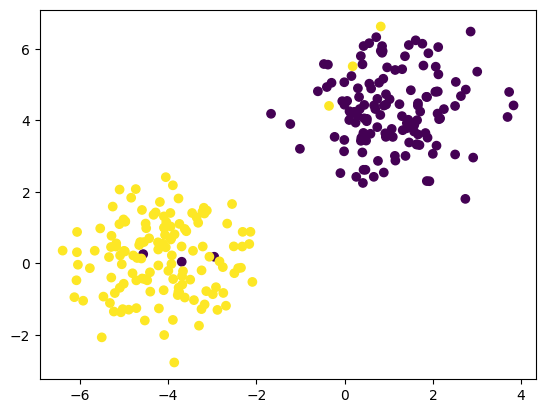

[2/10] Loss: -1.2951869861028416


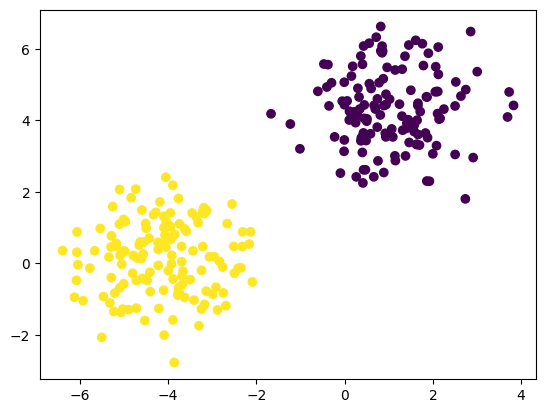

[3/10] Loss: -0.9363328328428335


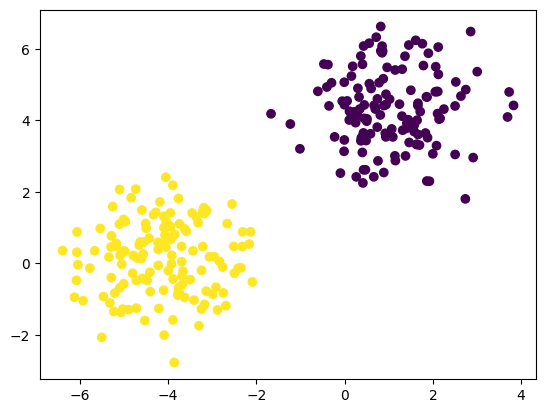

[4/10] Loss: -0.743523615087678


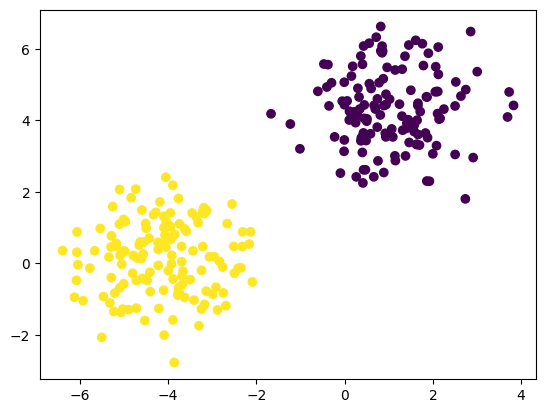

[5/10] Loss: -0.6214541059158083


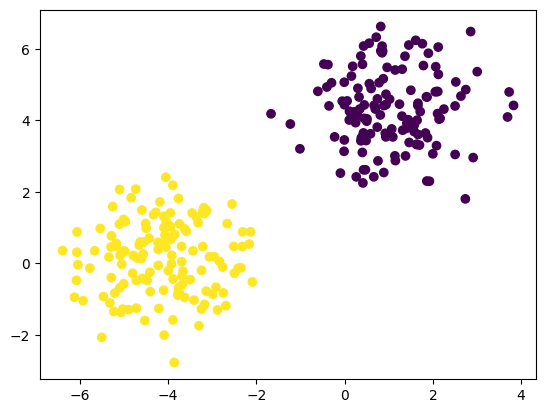

[6/10] Loss: -0.536511311828844


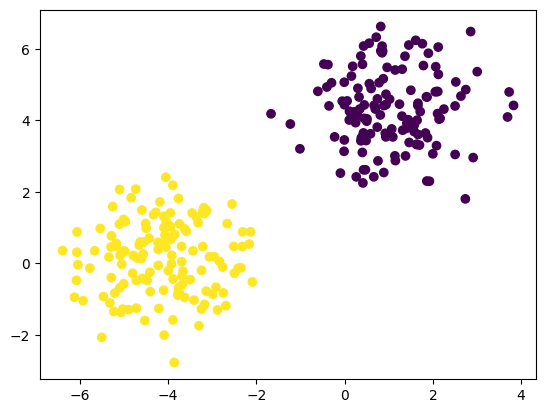

[7/10] Loss: -0.4736395023747986


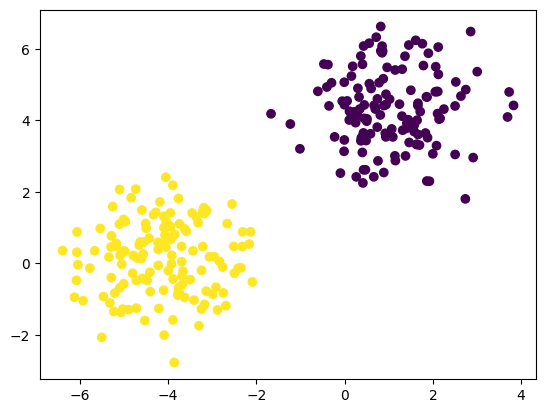

[8/10] Loss: -0.42503090631688445


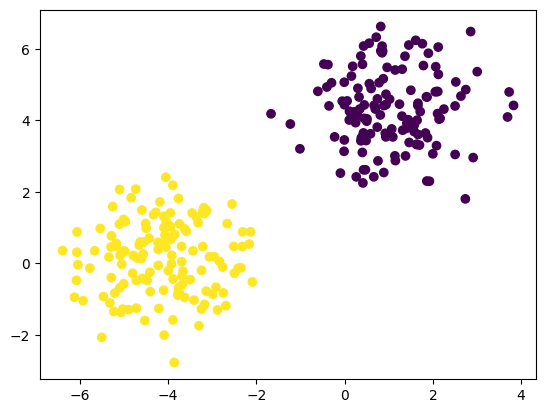

[9/10] Loss: -0.3862103483650081


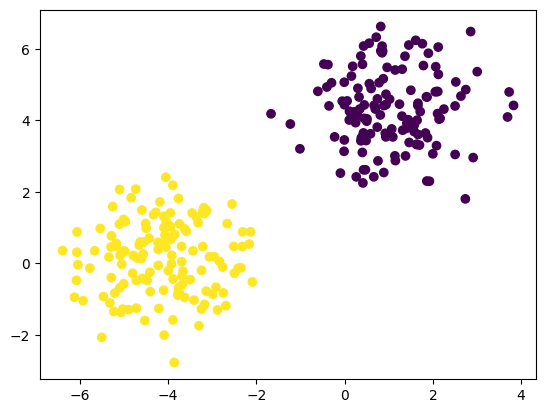

[10/10] Loss: -0.3544184396200814


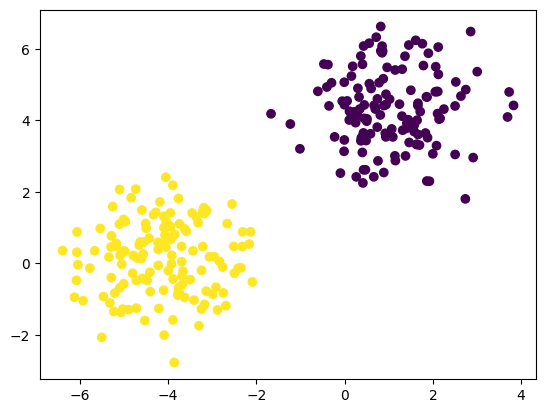

In [18]:
theta = np.ones(N_FEATURES + 1).reshape(N_FEATURES + 1, 1)
LEARNING_RATE = 0.1
ITERS = 10

def sigmoid_function(z):
    return 1/(1+exp(-z))

def calc_hypothesis(theta, x):
    hypothesis = theta.T @ x
    sigmoid_hypothesis = sigmoid_function(hypothesis)
    return sigmoid_hypothesis

def calc_loss_function(X, Y, theta):
    loss = 0
    for x,y in zip(X,Y):
        h_x = calc_hypothesis(theta, x)
        if (h_x == 1):
            h_x = 1- 0.000000001
        loss += y * log(h_x) + (1-y) * log(1-h_x)
    return loss

def update_parameters(theta, learning_rate, y, h_x, x):
    x = np.reshape(x, theta.shape)
    return theta + learning_rate * (y - h_x) * x


# holds hypothesis for each data point to be plotted
H_train = np.zeros((len(X_train), 1))

# Run logistic regression
for iter in range(ITERS):
    for i, (x, y) in enumerate(zip(X_train, Y_train)):
        h_x = calc_hypothesis(theta, x)
        H_train[i] = round(h_x)
        
        theta = update_parameters(theta, LEARNING_RATE, y, h_x, x)

    loss = calc_loss_function(X_train, Y_train, theta)
    print(f"[{iter+1}/{ITERS}] Loss: {loss}")

    plt.scatter(X_train[:, 1], X_train[:, 2], c=H_train[:, 0])
    plt.show()


### Test

Loss: -0.9677415961850889


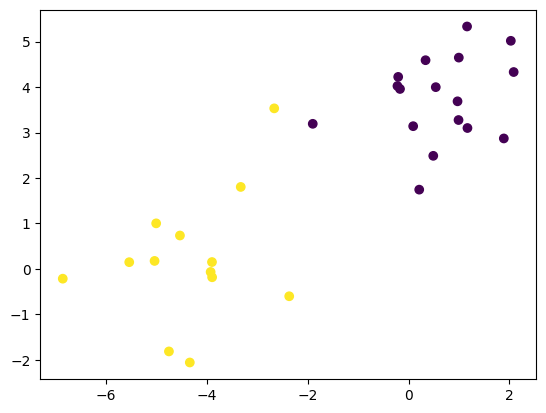

In [19]:
# holds hypothesis for each test data point
H_test = np.zeros((len(X_test), 1))

# Use computed thetas on test data set
for i, (x,y) in enumerate(zip(X_test, Y_test)):
    h_x = calc_hypothesis(theta, x)
    H_test[i] = round(h_x)

loss = calc_loss_function(X_test, Y_test, theta)
print(f"Loss: {loss}")

plt.scatter(X_test[:, 1], X_test[:, 2], c=H_test[:, 0])
plt.show()